Task 1



In [1]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This functions implements basic AND operations with MCP Neuron for two inputs.
    """
    assert len(X1) == len(X2), "Input arrays must be of the same length"
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron

def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    """
    assert len(X1) == len(X2), "Input arrays must be of the same length"
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron

# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T_AND = 2  # Threshold value for AND gate
result_and = MCP_Neurons_AND(X1, X2, T_AND)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T_AND}: {result_and}")

# Example usage for MCP_Neurons_OR function
T_OR = 1  # Threshold value for OR gate
result_or = MCP_Neurons_OR(X1, X2, T_OR)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T_OR}: {result_or}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]
Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Task 2

Loading the Dataset:

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)
Epoch 1/100 - Total Errors: 42
Epoch 2/100 - Total Errors: 23
Epoch 3/100 - Total Errors: 17
Epoch 4/100 - Total Errors: 17
Epoch 5/100 - Total Errors: 13
Epoch 6/100 - Total Errors: 9
Epoch 7/100 - Total Errors: 3
Epoch 8/100 - Total Errors: 6
Epoch 9/100 - Total Errors: 14
Epoch 10/100 - Total Errors: 10
Epoch 11/100 - Total Errors: 6
Epoch 12/100 - Total Errors: 3
Epoch 13/100 - Total Errors: 0
Accuracy: 100.00%
Number of misclassified images: 0


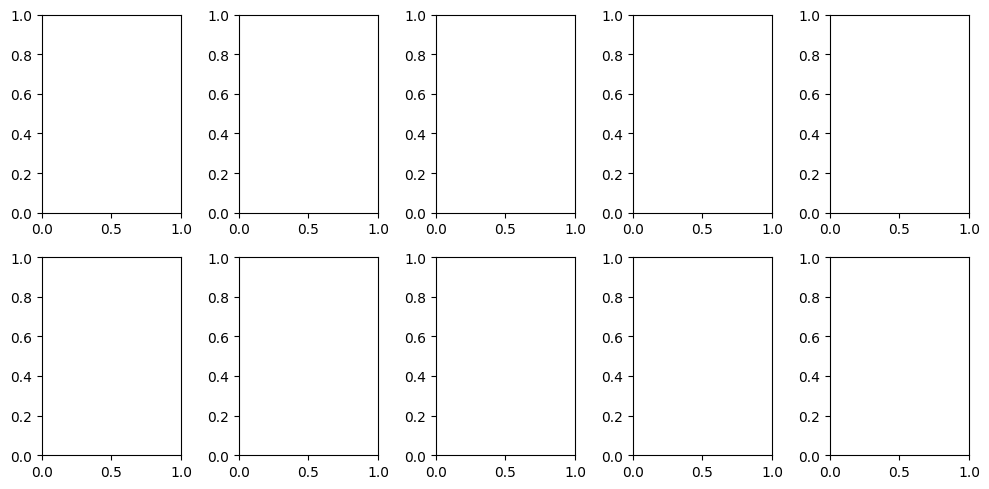

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Update the path if needed

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Perceptron Training
for epoch in range(epochs):
    total_errors = 0
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        prediction = 1 if linear_output >= 0 else 0
        error = y[i] - prediction
        if error != 0:
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            total_errors += 1
    print(f"Epoch {epoch + 1}/{epochs} - Total Errors: {total_errors}")
    if total_errors == 0:
        break

# Evaluate the model
predictions = [1 if np.dot(x, weights) + bias >= 0 else 0 for x in X]
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2%}")

# Visualize misclassified images
misclassified_indices = [i for i in range(len(y)) if predictions[i] != y[i]]
print(f"Number of misclassified images: {len(misclassified_indices)}")

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified_indices):
        idx = misclassified_indices[i]
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Label: {y[idx]} | Pred: {predictions[idx]}")
        ax.axis("off")
plt.tight_layout()
plt.show()


Visualizing the Dataset:

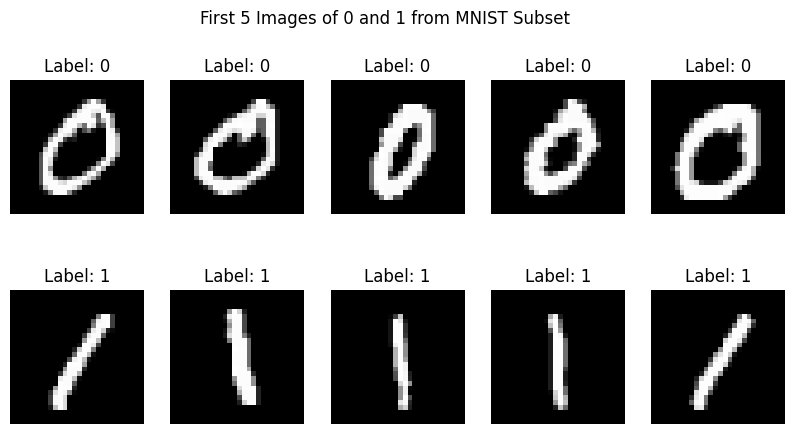

In [4]:
# Visualizing the Dataset
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
plt.show()

Initialization of the Weights:

In [5]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Implementation Decision Function:

In [8]:
import numpy as np
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all


Training the Perceptron:

In [9]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)
    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions.
    """
    for epoch in range(epochs):
        total_correct = 0
        for i in range(len(X)):
            linear_output = np.dot(X[i], weights) + bias
            prediction = 1 if linear_output >= 0 else 0
            error = y[i] - prediction

            # Update weights and bias only when there's an error
            if error != 0:
                weights += learning_rate * error * X[i]
                bias += learning_rate * error
            else:
                total_correct += 1

        # Calculate accuracy
        accuracy = total_correct / len(X)
        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.2%}")

        # Stop early if perfect accuracy is reached
        if total_correct == len(X):
            print("Training converged early.")
            break

    return weights, bias, accuracy


Training the Perceptron Algorithm:

In [10]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 100.00%
Training converged early.
The Final Accuracy is:  1.0


Visualizing Misclassified Image:


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
All images were correctly classified!


Task 3:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
# Load dataset
data = pd.read_csv("mnist_3_and_5.csv")

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last (pixel values)
y = data.iloc[:, -1].values  # The last column (labels)

# Convert labels: 3 -> 1, 5 -> 0
y = np.where(y == 3, 1, 0)


In [15]:
# Normalize the pixel values to range [0, 1]
X = X / 255.0


In [16]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # Number of features = 784 for MNIST
bias = 0
learning_rate = 0.1
n_epochs = 10  # Number of epochs for training


In [17]:
# Perceptron Algorithm
for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        # Compute the activation
        activation = np.dot(X[i], weights) + bias

        # Make prediction
        y_pred = 1 if activation >= 0 else 0

        # Update the weights and bias if there is a misclassification
        if y_pred != y[i]:
            weights += learning_rate * (y[i] - y_pred) * X[i]
            bias += learning_rate * (y[i] - y_pred)

    # Optionally print the accuracy after each epoch
    predictions = np.where(np.dot(X, weights) + bias >= 0, 1, 0)
    accuracy = np.mean(predictions == y)
    print(f"Epoch {epoch + 1}: Accuracy = {accuracy:.4f}")


Epoch 1: Accuracy = 1.0000
Epoch 2: Accuracy = 1.0000
Epoch 3: Accuracy = 1.0000
Epoch 4: Accuracy = 1.0000
Epoch 5: Accuracy = 1.0000
Epoch 6: Accuracy = 1.0000
Epoch 7: Accuracy = 1.0000
Epoch 8: Accuracy = 1.0000
Epoch 9: Accuracy = 1.0000
Epoch 10: Accuracy = 1.0000


In [18]:
# Get predictions
predictions = np.where(np.dot(X, weights) + bias >= 0, 1, 0)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Final Accuracy: {accuracy:.4f}")

# Visualize Misclassified Images
misclassified_idx = np.where(predictions != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {predictions[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
All images were correctly classified!
